## Anda telah mendapatkan pekerjaan dengan operator Hotel Ritz-Jager, sebagai data scientist. Operator hotel ini ingin meningkatkan efisiensi bisnis mereka dengan memanfaatkan data historis mereka dan mereka ingin mengetahui apa yang terjadi pada pemesanan mereka sebelumnya, mengenal pelanggan mereka lebih baik, dan mengoptimalkan waktu promo. Tim anda harus menganalisis data yang mereka miliki berdasarkan pertanyaan yang telah ditentukan sebelumnya yang diberikan oleh CEO anda. Dataset tugas ini dapat diunduh di sini: https://drive.google.com/file/d/1X3EIx_2ZiZmDoPwaz-_Os5uy0STpU4e8/view?usp=sharing

## Jawablah pertanyaan di bawah ini dengan menggunakan visualisasi data sebagai alat untuk menyampaikan informasi!

## 1. Dari mana para tamu berasal (asal negara)?
## 2. Bulan apakah yang merupakan bulan tersibuk (jumlah booking paling banyak)?
## 3. Berapa lama (malam) orang menginap di hotel (secara rata rata)?
## 4. Jumlah pemesanan berdasarkan segmen pasar (market segments)?
## 5. Berapa banyak jumlah pemesanan yang dibatalkan per tipe kamar hotel?
## 6. Bulan apa yang memiliki jumlah pembatalan tertinggi?

## Memuat Data

In [ ]:
# Menggunakan library pandas untuk membantu proses analisis data
import pandas as pd

# Data yang digunakan adalah 'Ritz_Jager_Data.csv'
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ritz_Jager_Data.csv')
data.head()

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


## Memahami Data

In [ ]:
# Memeriksa jumlah baris dan kolom pada data
data.shape

(119390, 32)

In [ ]:
# Memeriksa nama-nama judul kolom pada data
data.columns

Index(['hotel_type', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal_type',
       'country_origin', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## **Data Dictionary of the Dataset**

1. **hotel_type**: Types of the hotel, Resort Hotel, or City Hotel
2. **is_canceled**: The value indicating if the booking was
cancelled (1) or not (0)
3. **lead_time**: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
4. **arrival_date_year**: Year of arrival date
5. **arrival_date_month**: The month of arrival date
6. **arrival_date_week_number**: Week number of year for arrival date
7. **arrival_date_day_of_month**: Day of arrival date
8. **stays_in_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
9. **stays_in_week_nights**: Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel
10. **adults**: Number of adults
11. **children**: Number of children
12. **babies**: Number of babies
13. **meal_type**: Type of meal booked. Categories are presented in standard hospitality meal packages: **Undefined/SC** – no meal package; **BB** – Bed & Breakfast; **HB** – Half board (breakfast and one other meal – usually dinner); **FB **– Full board (breakfast, lunch and dinner)
14. **country_origin**: Country of origin. Categories are represented in the ISO 3155–3:2013 format
15. **market_segment**: Market segment designation. In categories, the term “**TA**” means “Travel Agents” and “**TO**” means “Tour Operators”
16. **distribution_channel**: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
17. **is_repeated_guest**: The value indicating if the booking name was from a repeated guest (1) or not (0)
18. **previous_cancellations**: Number of previous bookings that were cancelled by the customer prior to the current booking
19. **previous_bookings_not_canceled**: Number of previous bookings not cancelled by the customer prior to the current booking
20. **reserved_room_type**: Code of room type reserved. Code is presented instead of designation for anonymity reasons
21. **assigned_room_type**: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons
22. **booking_changes**: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
23. **deposit_type**: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:
- **No Deposit** – no deposit was made.
- **Non Refund** – a deposit was made in the value of the total stay cost.
- **Refundable** – a deposit was made with a value under the total cost of stay.
24. **agent_ID**: The ID of the travel agency that made the booking
25. **company_ID**: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
26. **days_in_waiting_list**: Number of days the booking was in the waiting list before it was confirmed to the customer
27. **customer_type**: Type of booking, assuming one of four categories:
- **Contract** - when the booking has an allotment or other type of contract associated to it;
- **Group** – when the booking is associated to a group;
- **Transient** – when the booking is not part of a group or contract, and is not associated to other transient booking;
- **Transient-party** – when the booking is transient, but is associated to at least other transient booking
28. **adr**: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
29. **required_car_parking_spaces**: Number of car parking spaces required by the customer
30. **total_of_special_requests**: Number of special requests made by the customer (e.g. twin bed or high floor)
31. **reservation_status**: Reservation last status, assuming one of three categories:
- **Canceled** – booking was canceled by the customer;
- **Check-Out** – customer has checked in but already departed;
- **No-Show** – customer did not check-in and did inform the hotel of the reason why
32. **reservation_status_date**: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

In [ ]:
# Memeriksa data inputs apa saja yang unik pada masing-masing kolom
data = pd.DataFrame(data, columns=['hotel_type', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal_type',
       'country_origin', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'])
for col in data:
  print (col, data[col].unique())

hotel_type ['Resort Hotel' 'City Hotel']
is_canceled [0 1]
lead_time [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 23

In [ ]:
# Memeriksa informasi pada data seperti index, jumlah kolom, judul masing-masing kolom, jumlah non-null, dan tipe data pada masing-masing kolom
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel_type                      119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal_type       

In [ ]:
# Memeriksa jumlah missing values pada masing-masing kolom
data.isnull().sum()

hotel_type                             0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal_type                              0
country_origin                       488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# Memeriksa ringkasan statistik pada masing-masing kolom bertipe numerik
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Pra-Pemrosesan Data

In [ ]:
# Fitur 'adults', 'children', dan 'babies' tidak mungkin semuanya bernilai nol pada saat yang bersamaan. Hal ini karena dianggap bahwa ketika seseorang melakukan pemesanan hotel, setidaknya ada satu orang dewasa yang akan menginap.
baris_invalid = (data['adults'] == 0) & (data['children'] == 0) & (data['babies'] == 0)

# Menghapus baris-baris yang dianggap invalid, yaitu yang nilai kolom 'adults', 'children', dan 'babies' bernilai nol pada saat yang bersamaan
data = data[~baris_invalid]

# Memeriksa jumlah kolom dan baris pada data setelah baris-baris invalid dihapus
data.shape

(119210, 32)

In [ ]:
# Memeriksa banyaknya baris yang memiliki duplikat
data.duplicated().sum()

31980

In [ ]:
# Menghapus baris-baris yang memiliki duplikat
data.drop_duplicates(inplace=True)

# Memastikan bahwa baris-baris yang memiliki duplikat sudah terhapus semua
data.duplicated().sum()

0

In [ ]:
# Memeriksa jumlah kolom dan baris pada data setelah baris-baris yang memiliki duplikat dihapus
data.shape

(87230, 32)

## 1. Dari mana para tamu berasal (asal negara)?

In [ ]:
# Memastikan bahwa kita hanya memproses data yang pemesanannya tidak dibatalkan ('is_canceled' == 0)
pemesanan_valid = data[data['is_canceled'] == 0]

# Menghitung jumlah tamu berdasarkan asal negara pada pemesanan yang valid
data_asal_negara = pemesanan_valid['country_origin'].value_counts().reset_index()

# Mengubah nama kolom agar lebih deskriptif
data_asal_negara.columns = ['asal_negara', 'jumlah_tamu']

# Mengubah kode negara menjadi nama negara
data_asal_negara['asal_negara'] = data_asal_negara['asal_negara'].map({
    'PRT': 'Portugal',
    'GBR': 'Inggris',
    'USA': 'Amerika Serikat',
    'ESP': 'Spanyol',
    'IRL': 'Irlandia',
    'FRA': 'Perancis',
    'ROU': 'Rumania',
    'NOR': 'Norwegia',
    'OMN': 'Oman',
    'ARG': 'Argentina',
    'POL': 'Polandia',
    'DEU': 'Jerman',
    'BEL': 'Belgia',
    'CHE': 'Swiss',
    'CN': 'China',
    'GRC': 'Yunani',
    'ITA': 'Italia',
    'NLD': 'Belanda',
    'DNK': 'Denmark',
    'RUS': 'Rusia',
    'SWE': 'Swedia',
    'AUS': 'Australia',
    'EST': 'Estonia',
    'CZE': 'Republik Ceko',
    'BRA': 'Brasil',
    'FIN': 'Finlandia',
    'MOZ': 'Mozambik',
    'BWA': 'Botswana',
    'LUX': 'Luksemburg',
    'SVN': 'Slovenia',
    'ALB': 'Albania',
    'IND': 'India',
    'CHN': 'China',
    'MEX': 'Meksiko',
    'MAR': 'Maroko',
    'UKR': 'Ukraina',
    'SMR': 'San Marino',
    'LVA': 'Latvia',
    'PRI': 'Puerto Riko',
    'SRB': 'Serbia',
    'CHL': 'Chile',
    'AUT': 'Austria',
    'BLR': 'Belarusia',
    'LTU': 'Lituania',
    'TUR': 'Turki',
    'ZAF': 'Afrika Selatan',
    'AGO': 'Angola',
    'ISR': 'Israel',
    'CYM': 'Kepulauan Cayman',
    'ZMB': 'Zambia',
    'CPV': 'Cape Verde',
    'ZWE': 'Zimbabwe',
    'DZA': 'Aljazair',
    'KOR': 'Korea Selatan',
    'CRI': 'Kosta Rika',
    'HUN': 'Hungaria',
    'ARE': 'Uni Emirat Arab',
    'TUN': 'Tunisia',
    'JAM': 'Jamaika',
    'HRV': 'Kroasia',
    'HKG': 'Hong Kong',
    'IRN': 'Iran',
    'GEO': 'Georgia',
    'AND': 'Andorra',
    'GIB': 'Gibraltar',
    'URY': 'Uruguay',
    'JEY': 'Jersey',
    'CAF': 'Republik Afrika Tengah',
    'CYP': 'Siprus',
    'COL': 'Kolombia',
    'GGY': 'Guernsey',
    'KWT': 'Kuwait',
    'NGA': 'Nigeria',
    'MDV': 'Maladewa',
    'VEN': 'Venezuela',
    'SVK': 'Slovakia',
    'FJI': 'Fiji',
    'KAZ': 'Kazakhstan',
    'PAK': 'Pakistan',
    'IDN': 'Indonesia',
    'LBN': 'Lebanon',
    'PHL': 'Filipina',
    'SEN': 'Senegal',
    'SYC': 'Seychelles',
    'AZE': 'Azerbaijan',
    'BHR': 'Bahrain',
    'NZL': 'Selandia Baru',
    'THA': 'Thailand',
    'DOM': 'Republik Dominika',
    'MKD': 'Makedonia Utara',
    'MYS': 'Malaysia',
    'ARM': 'Armenia',
    'JPN': 'Jepang',
    'LKA': 'Sri Lanka',
    'CUB': 'Kuba',
    'CMR': 'Kamerun',
    'BIH': 'Bosnia dan Herzegovina',
    'MUS': 'Mauritius',
    'COM': 'Comoros',
    'SUR': 'Suriname',
    'UGA': 'Uganda',
    'BGR': 'Bulgaria',
    'CIV': 'Ivory Coast',
    'JOR': 'Yordania',
    'SYR': 'Suriah',
    'SGP': 'Singapura',
    'BDI': 'Burundi',
    'SAU': 'Arab Saudi',
    'VNM': 'Vietnam',
    'PLW': 'Palau',
    'QAT': 'Qatar',
    'EGY': 'Mesir',
    'PER': 'Peru',
    'MLT': 'Malta',
    'MWI': 'Malawi',
    'ECU': 'Ekuador',
    'MDG': 'Madagaskar',
    'ISL': 'Islandia',
    'UZB': 'Uzbekistan',
    'NPL': 'Nepal',
    'BHS': 'Bahama',
    'MAC': 'Makau',
    'TGO': 'Togo',
    'TWN': 'Taiwan',
    'DJI': 'Djibouti',
    'STP': 'Sao Tome dan Principe',
    'KNA': 'Saint Kitts dan Nevis',
    'ETH': 'Ethiopia',
    'IRQ': 'Irak',
    'HND': 'Honduras',
    'RWA': 'Rwanda',
    'KHM': 'Kamboja',
    'MCO': 'Monako',
    'BGD': 'Bangladesh',
    'IMN': 'Isle of Man',
    'TJK': 'Tajikistan',
    'NIC': 'Nikaragua',
    'BEN': 'Benin',
    'VGB': 'Kepulauan Virgin Britania Raya',
    'TZA': 'Tanzania',
    'GAB': 'Gabon',
    'GHA': 'Ghana',
    'TMP': 'Timor-Leste',
    'GLP': 'Guadeloupe',
    'KEN': 'Kenya',
    'LIE': 'Liechtenstein',
    'GNB': 'Guinea-Bissau',
    'MNE': 'Montenegro',
    'UMI': 'Kepulauan Terluar AS',
    'MYT': 'Mayotte',
    'FRO': 'Kepulauan Faroe',
    'MMR': 'Myanmar',
    'PAN': 'Panama',
    'BFA': 'Burkina Faso',
    'LBY': 'Libya',
    'MLI': 'Mali',
    'NAM': 'Namibia',
    'BOL': 'Bolivia',
    'PRY': 'Paraguay',
    'BRB': 'Barbados',
    'ABW': 'Aruba',
    'AIA': 'Anguilla',
    'SLV': 'El Salvador',
    'DMA': 'Dominika',
    'PYF': 'Polinesia Prancis',
    'GUY': 'Guyana',
    'LCA': 'Saint Lucia',
    'ATA': 'Antartika',
    'GTM': 'Guatemala',
    'ASM': 'Samoa Amerika',
    'MRT': 'Mauritania',
    'NCL': 'Kaledonia Baru',
    'KIR': 'Kiribati',
    'SDN': 'Sudan',
    'ATF': 'Wilayah Selatan dan Antartika Prancis',
    'SLE': 'Sierra Leone',
    'LAO': 'Laos'
})

# Menampilkan data asal negara
data_asal_negara

,asal_negara,jumlah_tamu
0,Portugal,17573
1,Inggris,8440
2,Perancis,7091
3,Spanyol,5382
4,Jerman,4332
...,...,...
160,Zambia,1
161,Seychelles,1
162,Madagaskar,1
163,San Marino,1


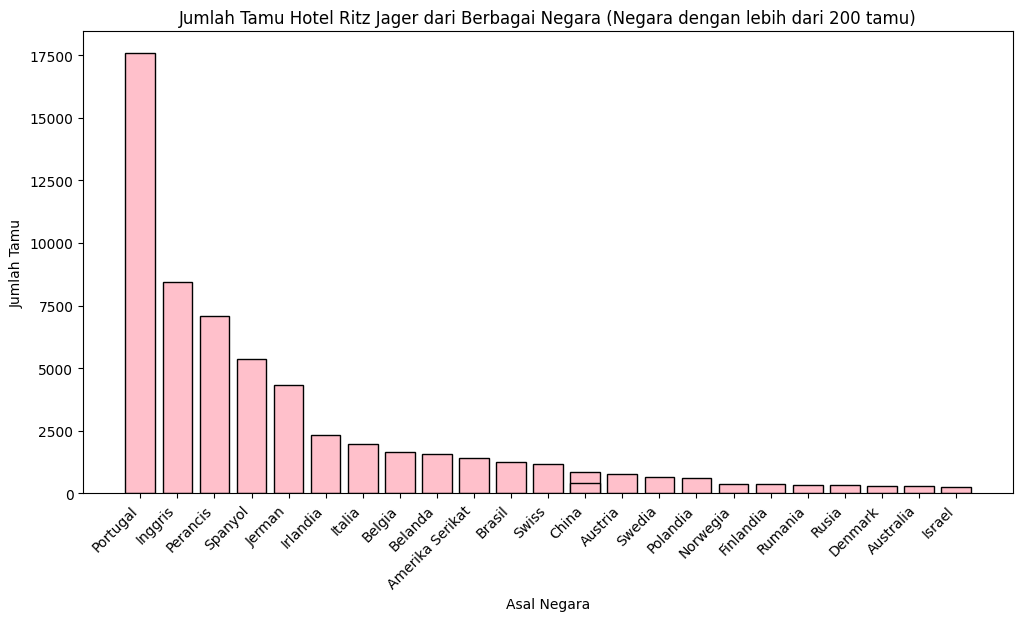

In [ ]:
import matplotlib.pyplot as plt

# Memfilter negara dengan jumlah tamu kurang dari 200
negara_kurang_dari_200 = data_asal_negara[data_asal_negara['jumlah_tamu'] < 200]
nama_negara_asal = data_asal_negara[data_asal_negara['jumlah_tamu'] >= 200]

# Plotting
plt.subplots(figsize=(12, 6))

# Membuat diagram batang
plt.bar(nama_negara_asal['asal_negara'], nama_negara_asal['jumlah_tamu'], color='pink', edgecolor='black')

# Menambahkan judul ke diagram
plt.title('Jumlah Tamu Hotel Ritz Jager dari Berbagai Negara (Negara dengan lebih dari 200 tamu)')

# Menambahkan label sumbu x
plt.xlabel('Asal Negara')

# Menambahkan label sumbu y
plt.ylabel('Jumlah Tamu')

# Mengatur rotasi label asal negara pada sumbu x agar mudah dibaca
plt.xticks(rotation=45, ha='right')

# Menampilkan diagram
plt.show()

In [ ]:
# Menampilkan informasi mengenai negara asal tamu hotel Ritz Jager
print(f'Tamu hotel Ritz Jager berasal dari berbagai negara yaitu {", ".join(nama_negara_asal["asal_negara"].dropna().unique())}.')

Tamu hotel Ritz Jager berasal dari berbagai negara yaitu Portugal, Inggris, Perancis, Spanyol, Jerman, Irlandia, Italia, Belgia, Belanda, Amerika Serikat, Brasil, Swiss, China, Austria, Swedia, Polandia, Norwegia, Finlandia, Rumania, Rusia, Denmark, Australia, Israel.


## 2. Bulan apakah yang merupakan bulan tersibuk (jumlah booking paling banyak)?

In [ ]:
# Mengubah nama-nama bulan yang semula ditulis dalam Bahasa Inggris menjadi nama-nama bulan dalam Bahasa Indonesia lalu menghitung jumlah tamu pada masing-masing bulan
pemesanan_valid['arrival_date_month'] = pemesanan_valid['arrival_date_month'].map({
    'January': 'Januari',
    'February': 'Februari',
    'March': 'Maret',
    'April': 'April',
    'May': 'Mei',
    'June': 'Juni',
    'July': 'Juli',
    'August': 'Agustus',
    'September': 'September',
    'October': 'Oktober',
    'November': 'November',
    'December': 'Desember'
})

# Penghitungan jumlah tamu per bulan, setiap entri merupakan kombinasi bulan dan tahun kedatangan tamu
pemesanan_per_bulan = (pemesanan_valid['arrival_date_month'] + ' ' + pemesanan_valid['arrival_date_year'].astype('str')).value_counts()

# Menampilkan jumlah pemesanan per bulan
pemesanan_per_bulan

<ipython-input-15-09242a388a45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pemesanan_valid['arrival_date_month'] = pemesanan_valid['arrival_date_month'].map({


Mei 2017          3066
Oktober 2016      3025
Agustus 2016      2973
Maret 2016        2940
Juli 2017         2933
Mei 2016          2836
Juni 2017         2799
September 2016    2772
Agustus 2017      2771
April 2016        2754
Juli 2016         2754
April 2017        2740
Maret 2017        2720
Juni 2016         2604
November 2016     2502
Februari 2017     2398
Februari 2016     2273
September 2015    2269
Oktober 2015      2254
Desember 2016     2132
Januari 2017      2100
Agustus 2015      1876
Desember 2015     1603
Januari 2016      1548
November 2015     1419
Juli 2015         1160
dtype: int64

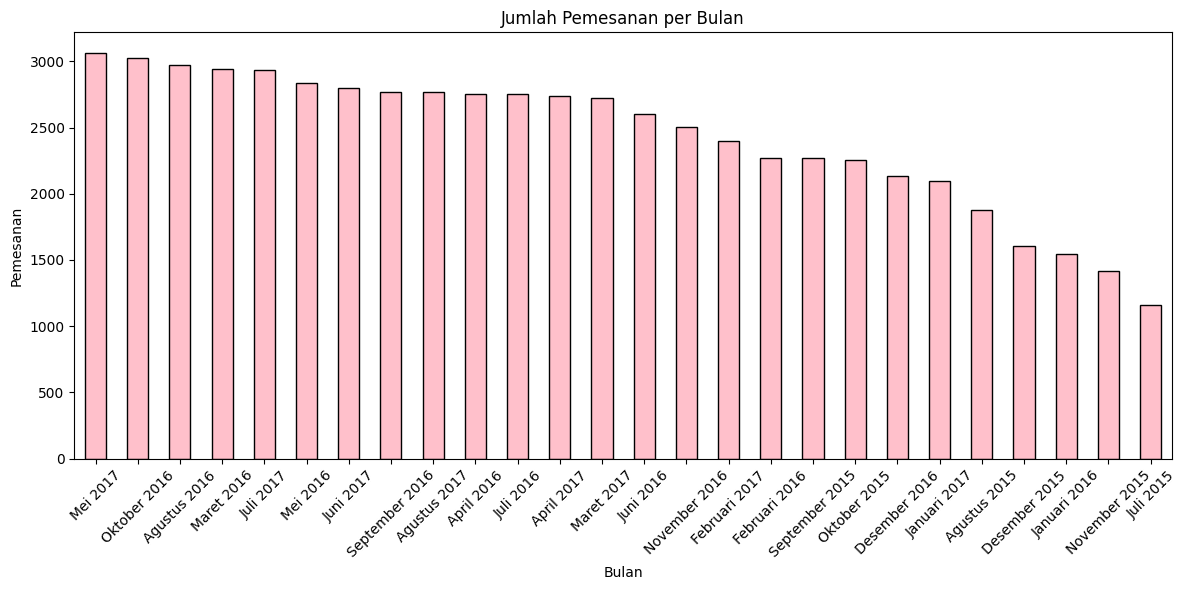

In [ ]:
# Plotting
plt.subplots(figsize=(12, 6))

# Membuat diagram batang
pemesanan_per_bulan.plot(kind='bar', color='pink', edgecolor='black')

# Menambahkan judul ke diagram
plt.title('Jumlah Pemesanan per Bulan')

# Menambahkan label sumbu x
plt.xlabel('Bulan')

# Menambahkan label sumbu y
plt.ylabel('Pemesanan')

# Mengatur rotasi label bulan pada sumbu x agar mudah dibaca
plt.xticks(rotation=45)

# Menata tata letak agar visualisasi terlihat rapi
plt.tight_layout()

# Menampilkan diagram
plt.show()

In [ ]:
# Menampilkan informasi mengenai bulan tersibuk (memiliki jumlah pemesanan paling banyak)
print(f'Pemesanan paling banyak di Hotel Ritz Jager adalah pada bulan {(pemesanan_per_bulan.idxmax())}.')

Pemesanan paling banyak di Hotel Ritz Jager adalah pada bulan Mei 2017.


## 3. Berapa lama (malam) orang menginap di hotel (secara rata rata)?

<ipython-input-18-165c3199f856>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pemesanan_valid['lama_menginap'] = pemesanan_valid['stays_in_weekend_nights'] + pemesanan_valid['stays_in_week_nights']


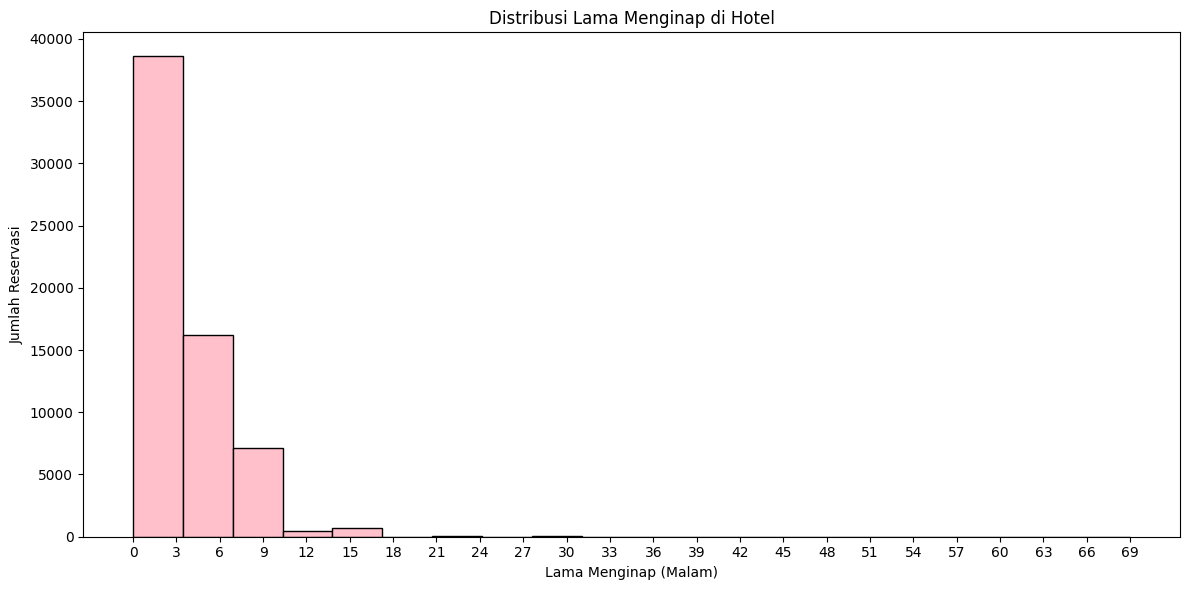

In [ ]:
import numpy as np

# Menambahkan kolom baru 'lama_menginap' dengan menggabungkan 'stays_in_weekend_nights' dan 'stays_in_week_nights'
pemesanan_valid['lama_menginap'] = pemesanan_valid['stays_in_weekend_nights'] + pemesanan_valid['stays_in_week_nights']

# Menghitung rata-rata lama menginap dari dataset
rata_rata_lama_menginap = pemesanan_valid['lama_menginap'].mean()

# Plotting
plt.subplots(figsize=(12, 6))

# Membuat histogram untuk melihat distribusi lama menginap di hotel
plt.hist(pemesanan_valid['lama_menginap'], bins=20, color='pink', edgecolor='black')

# Menambahkan judul ke diagram
plt.title('Distribusi Lama Menginap di Hotel')

# Menambahkan label sumbu x
plt.xlabel('Lama Menginap (Malam)')

# Menambahkan label sumbu y
plt.ylabel('Jumlah Reservasi')

# Menentukan interval untuk menampilkan label pada sumbu x
xticks_interval = 3
plt.xticks(np.arange(0, pemesanan_valid['lama_menginap'].max() + 1, xticks_interval))

# Menata tata letak agar visualisasi terlihat rapi
plt.tight_layout()

# Menampilkan plot histogram
plt.show()

In [ ]:
# Menampilkan informasi lama (malam) orang menginap di hotel (secara rata rata)
print(f"Rata-rata lama (malam) orang menginap di hotel adalah {rata_rata_lama_menginap:.0f} malam.")

Rata-rata lama (malam) orang menginap di hotel adalah 3 malam.


## 4. Jumlah pemesanan berdasarkan segmen pasar (market segments)?

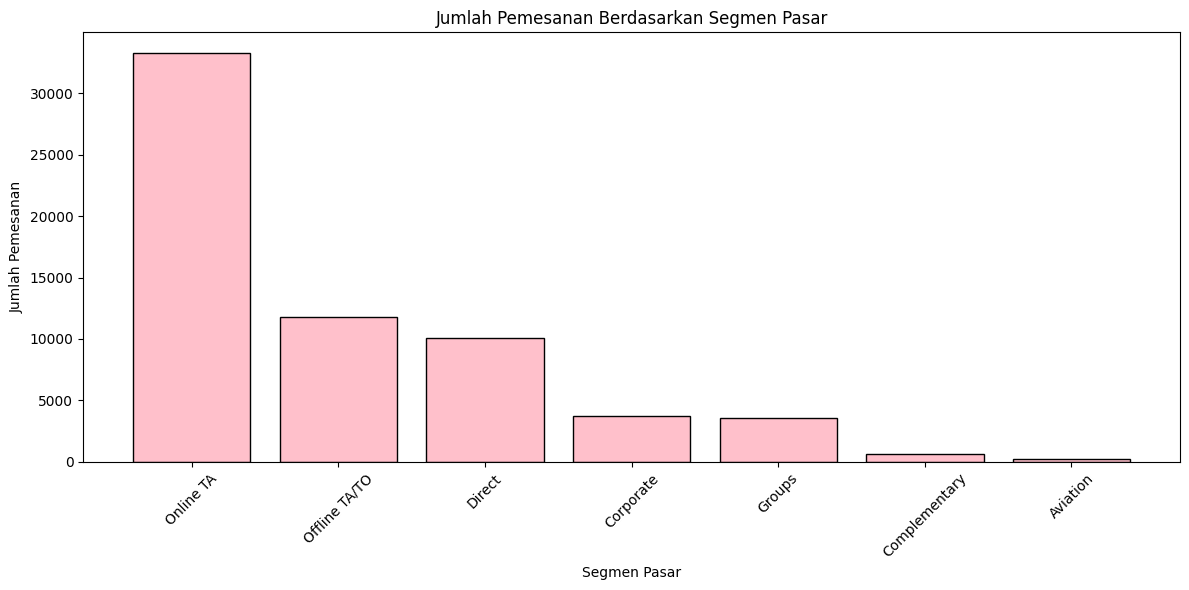

In [ ]:
# Menggunakan metode groupby untuk mengelompokkan data berdasarkan segmen pasar
pengelompokan_berdasarkan_segmen_pasar = pemesanan_valid.groupby('market_segment')

# Mengurutkan grup berdasarkan jumlah pemesanan dari yang terbanyak
jumlah_pemesanan_per_segmen = pengelompokan_berdasarkan_segmen_pasar.size().sort_values(ascending=False)

# Plotting
plt.subplots(figsize=(12, 6))

# Menampilkan diagram batang untuk memberikan gambaran jumlah pemesanan untuk setiap segmen pasar
plt.bar(jumlah_pemesanan_per_segmen.index, jumlah_pemesanan_per_segmen, color='pink', edgecolor='black')

# Menambahkan judul ke diagram
plt.title('Jumlah Pemesanan Berdasarkan Segmen Pasar')

# Menambahkan label sumbu x
plt.xlabel('Segmen Pasar')

# Menambahkan label sumbu y
plt.ylabel('Jumlah Pemesanan')

# Mengatur rotasi label bulan pada sumbu x agar mudah dibaca
plt.xticks(rotation=45)

# Menata tata letak agar visualisasi terlihat rapi
plt.tight_layout()

# Menampilkan diagram
plt.show()

## 5. Berapa banyak jumlah pemesanan yang dibatalkan per tipe kamar hotel?

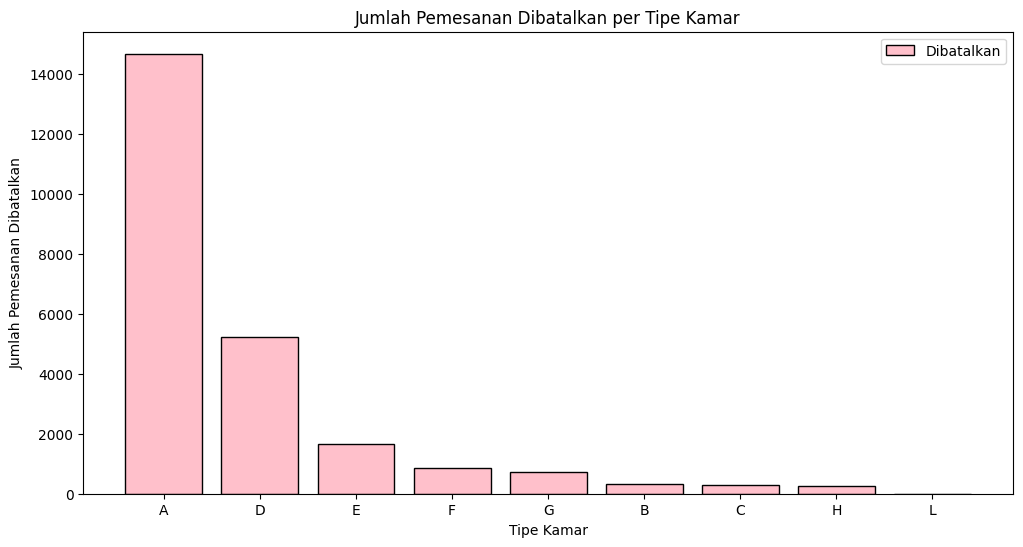

In [ ]:
# Membuat subdataframe hanya untuk pemesanan yang dibatalkan
pemesanan_dibatalkan = data[data['is_canceled'] == 1]

# Menghitung banyak jumlah pemesanan yang dibatalkan per tipe kamar hotel
jumlah_pemesanan_dibatalkan = pemesanan_dibatalkan.groupby('reserved_room_type')['is_canceled'].value_counts().unstack()
jumlah_pemesanan_dibatalkan = jumlah_pemesanan_dibatalkan.sort_values(by=1, ascending=False)

# Plotting
plt.subplots(figsize=(12, 6))

# Menampilkan diagram batang untuk memberikan gambaran jumlah pemesanan yang dibatalkan per tipe kamar
plt.bar(jumlah_pemesanan_dibatalkan.index, jumlah_pemesanan_dibatalkan[1], color='pink', edgecolor='black', label='Dibatalkan')

# Menambahkan judul ke diagram
plt.title('Jumlah Pemesanan Dibatalkan per Tipe Kamar')

# Menambahkan label sumbu x
plt.xlabel('Tipe Kamar')

# Menambahkan label sumbu y
plt.ylabel('Jumlah Pemesanan Dibatalkan')

# Menunjukkan warna dan label yang terkait dengan data yang diplot
plt.legend()

# Menampilkan diagram
plt.show()


In [ ]:
for reserved_room_type, jumlah in zip(jumlah_pemesanan_dibatalkan.index, jumlah_pemesanan_dibatalkan[1]):
    print(f"Banyak jumlah pemesanan yang dibatalkan pada tipe {reserved_room_type} adalah sebanyak {jumlah}.")

Banyak jumlah pemesanan yang dibatalkan pada tipe A adalah sebanyak 14682.
Banyak jumlah pemesanan yang dibatalkan pada tipe D adalah sebanyak 5235.
Banyak jumlah pemesanan yang dibatalkan pada tipe E adalah sebanyak 1646.
Banyak jumlah pemesanan yang dibatalkan pada tipe F adalah sebanyak 851.
Banyak jumlah pemesanan yang dibatalkan pada tipe G adalah sebanyak 737.
Banyak jumlah pemesanan yang dibatalkan pada tipe B adalah sebanyak 317.
Banyak jumlah pemesanan yang dibatalkan pada tipe C adalah sebanyak 296.
Banyak jumlah pemesanan yang dibatalkan pada tipe H adalah sebanyak 243.
Banyak jumlah pemesanan yang dibatalkan pada tipe L adalah sebanyak 2.


## 6. Bulan apa yang memiliki jumlah pembatalan tertinggi?

In [ ]:
# Menghitung jumlah pembatalan per bulan
jumlah_pembatalan_per_bulan = data[data['is_canceled'] == 1].groupby(['arrival_date_year', 'arrival_date_month']).size().reset_index(name='jumlah_pembatalan')

# Mengubah nama-nama bulan yang semula ditulis dalam Bahasa Inggris menjadi nama-nama bulan dalam Bahasa Indonesia lalu menghitung jumlah tamu pada masing-masing bulan
jumlah_pembatalan_per_bulan['arrival_date_month'] = jumlah_pembatalan_per_bulan['arrival_date_month'].map({
    'January': 'Januari',
    'February': 'Februari',
    'March': 'Maret',
    'April': 'April',
    'May': 'Mei',
    'June': 'Juni',
    'July': 'Juli',
    'August': 'Agustus',
    'September': 'September',
    'October': 'Oktober',
    'November': 'November',
    'December': 'Desember'
})

# Menggabungkan bulan dan tahun menjadi satu kolom
jumlah_pembatalan_per_bulan['bulan_tahun'] = jumlah_pembatalan_per_bulan['arrival_date_month'] + ' ' + jumlah_pembatalan_per_bulan['arrival_date_year'].astype(str)

# Menghitung jumlah pembatalan untuk setiap bulan dan tahun
jumlah_pembatalan = jumlah_pembatalan_per_bulan.groupby('bulan_tahun')['jumlah_pembatalan'].sum()

# Mencari bulan dengan pembatalan tertinggi
bulan_pembatalan_tertinggi = jumlah_pembatalan.idxmax()

# Menampilkan hasil
print(f"Bulan dengan jumlah pembatalan tertinggi adalah {bulan_pembatalan_tertinggi}.")

Bulan dengan jumlah pembatalan tertinggi adalah Agustus 2017.


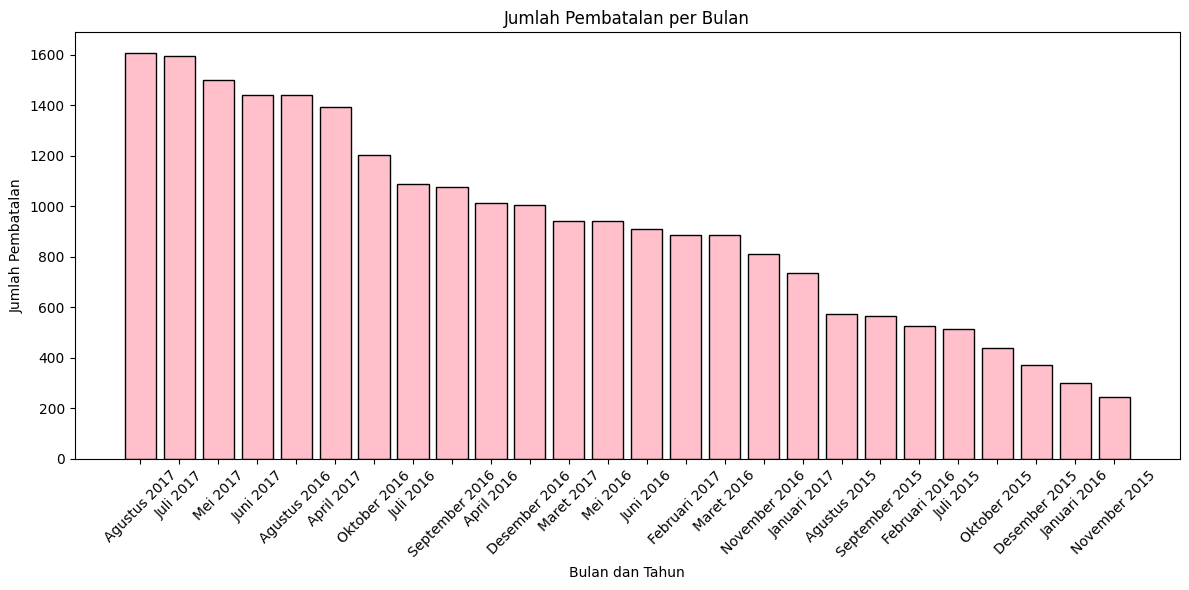

In [ ]:
# Mengurutkan berdasarkan jumlah pembatalan terbanyak
jumlah_pembatalan = jumlah_pembatalan.sort_values(ascending=False)

# Plotting
plt.subplots(figsize=(12, 6))

# Menampilkan hasil dalam bentuk diagram batang
plt.bar(jumlah_pembatalan.index, jumlah_pembatalan, color='pink', edgecolor='black')

# Menambahkan judul ke diagram
plt.title('Jumlah Pembatalan per Bulan')

# Menambahkan label sumbu x
plt.xlabel('Bulan dan Tahun')

# Menambahkan label sumbu y
plt.ylabel('Jumlah Pembatalan')

# Mengatur rotasi label bulan pada sumbu x agar mudah dibaca
plt.xticks(rotation=45)

# Menata tata letak agar visualisasi terlihat rapi
plt.tight_layout()

# Menampilkan diagram
plt.show()